<a href="https://colab.research.google.com/github/spellsharp/Synapse2.0/blob/master/Autonmous_Vehicle_Navigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%cd drive/MyDrive/Colab\ Notebooks

[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks'
/content/drive/MyDrive/Colab Notebooks


In [4]:
!mkdir automate

In [5]:
%cd automate

/content/drive/MyDrive/Colab Notebooks/automate


In [6]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.0/78.2 GB disk)


In [7]:
from ultralytics import YOLO


from IPython.display import display, Image

In [15]:
%ls

vehicle-1/  yolov8m.pt


In [10]:
!mkdir datasets

In [11]:
%cd datasets

/content/drive/MyDrive/Colab Notebooks/automate/datasets


In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RYH3NbkBaK8YfBoraeDD")
project = rf.workspace("objectdetection-oelqv").project("vehicle-ug1aw")
version = project.version(1)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to vehicle-1 in yolov8:: 100%|██████████| 16388/16388 [02:10<00:00, 125.68it/s]


In [20]:
!yolo task=detect mode=train model=yolov8n.pt data=vehicle-1/data.yaml epochs=10 imgsz=800 plots=True batch = 10

New https://pypi.org/project/ultralytics/8.2.2 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=vehicle-1/data.yaml, epochs=10, patience=50, batch=10, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nm

In [21]:
 %ls

runs/  vehicle-1/  yolov8n.pt  yolov8x.pt


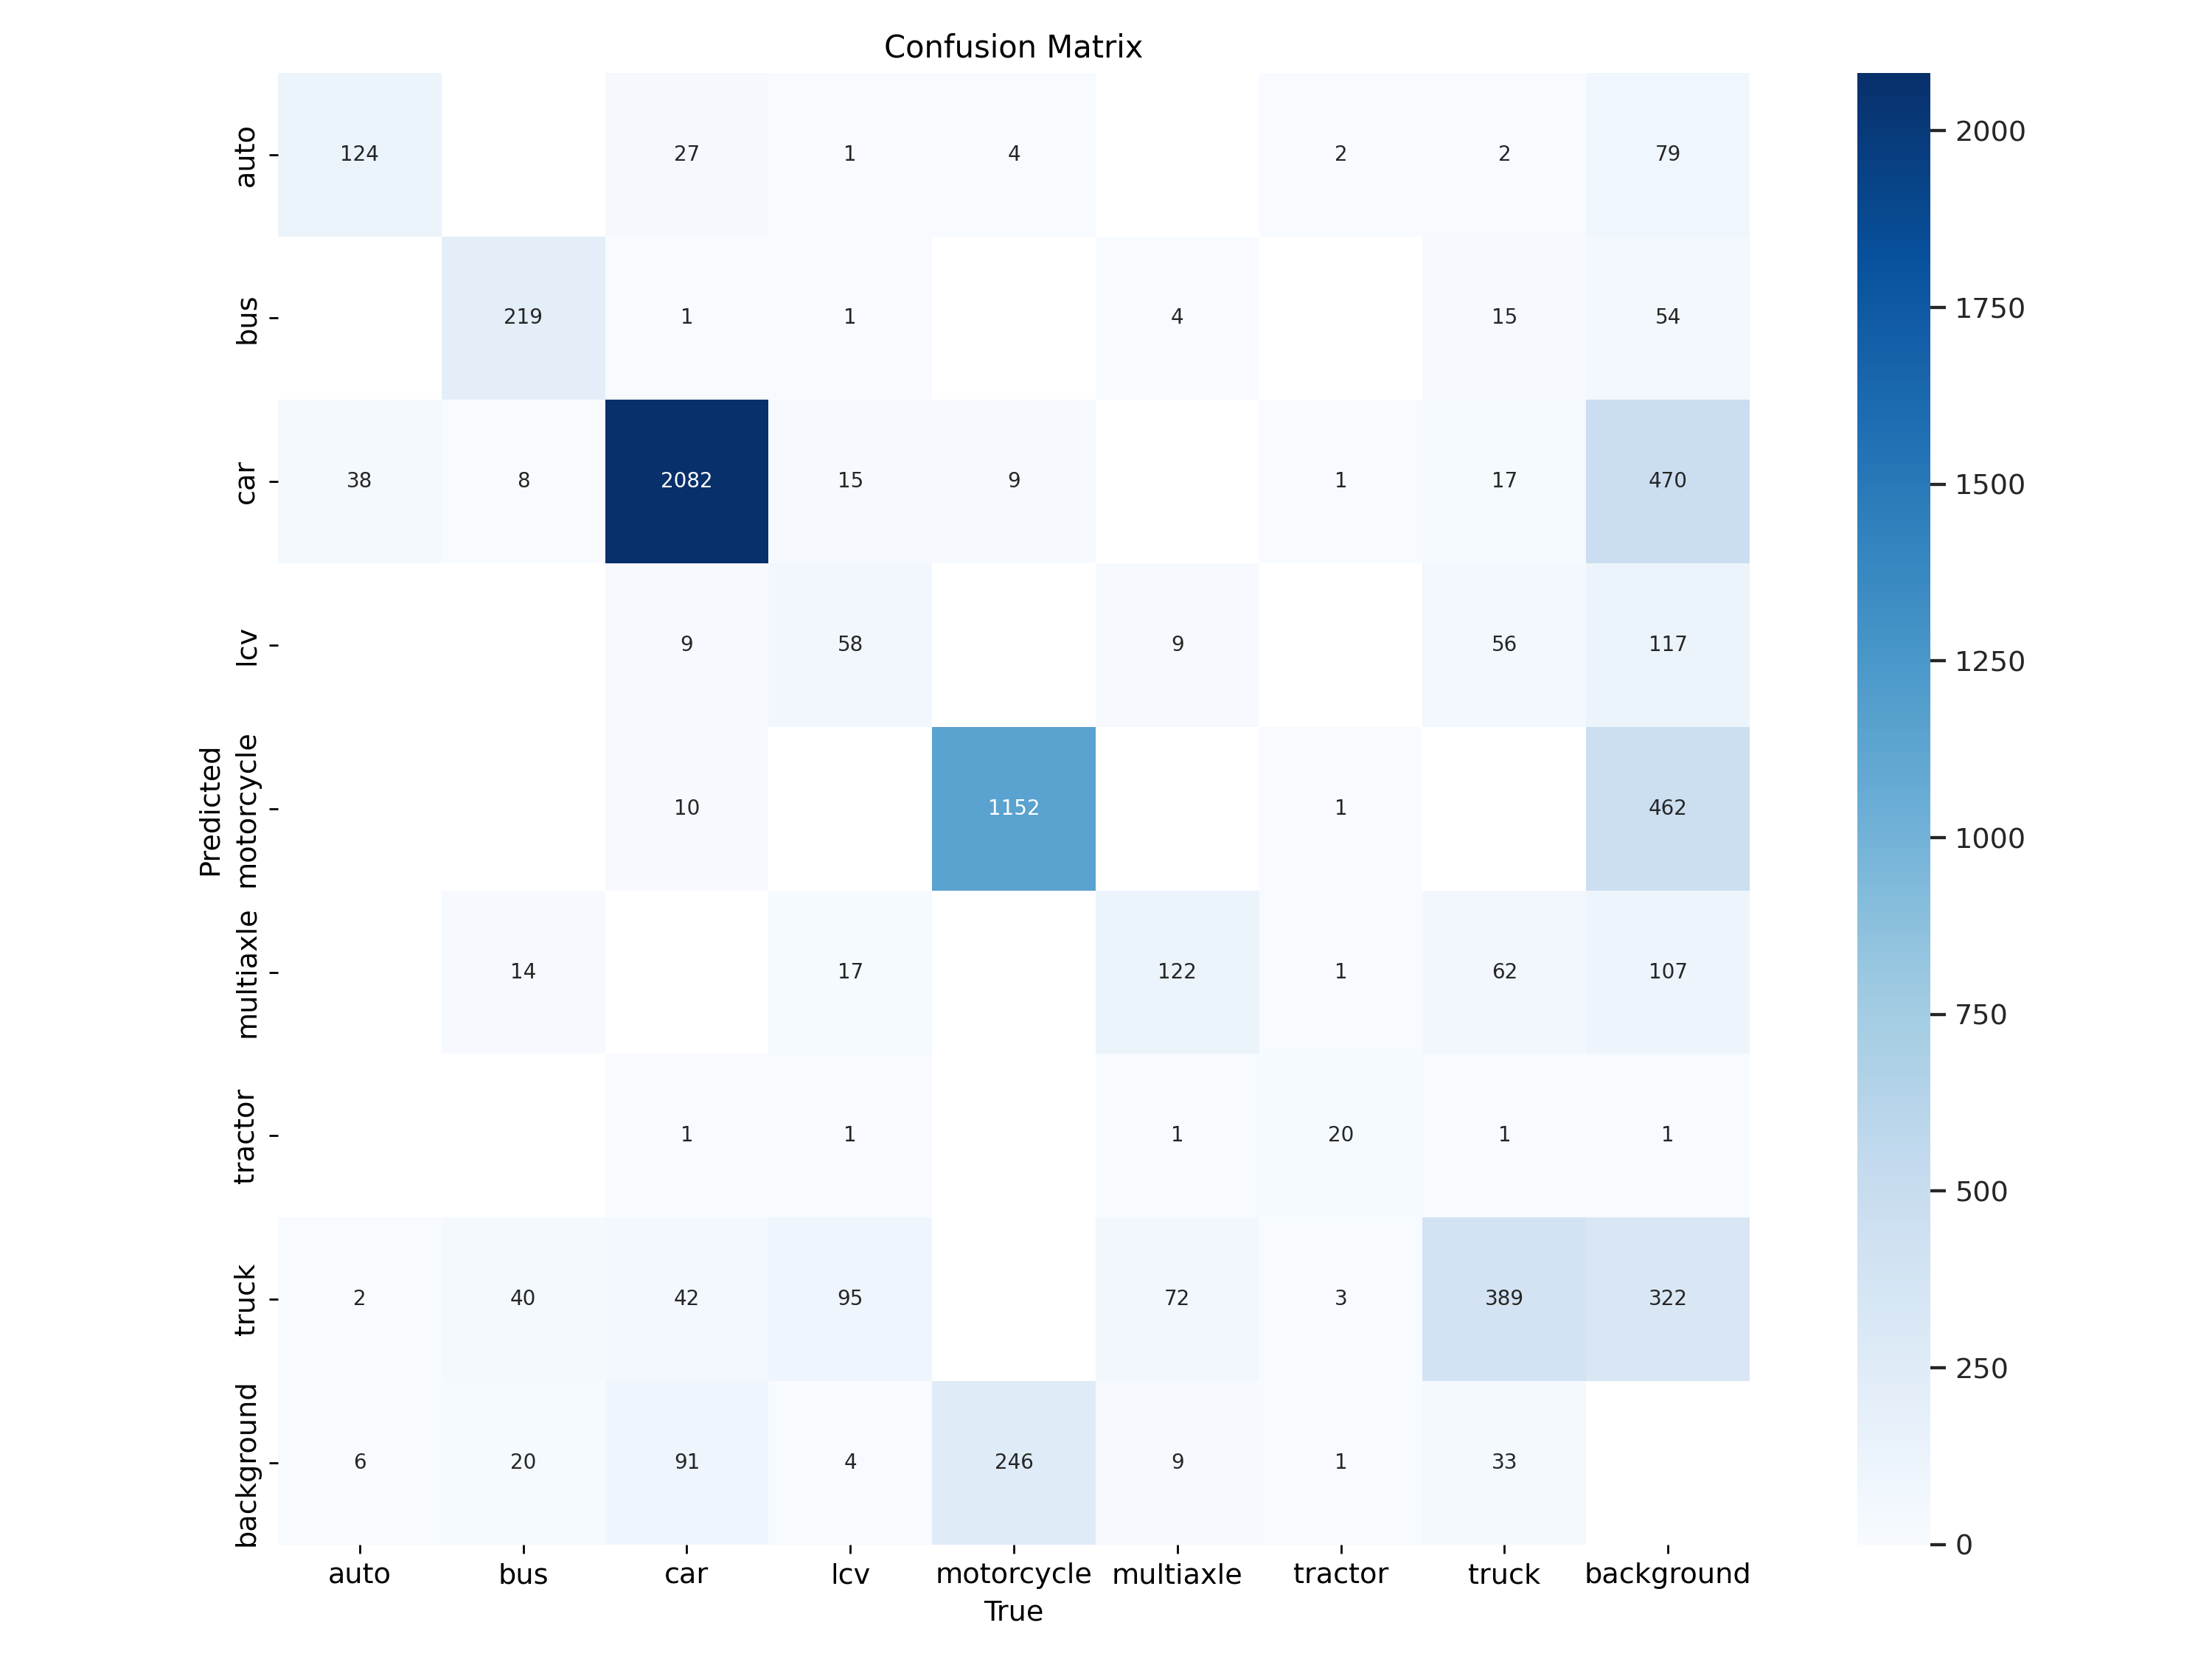

In [23]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/automate/datasets/runs/detect/train5/confusion_matrix.png', width = 600)

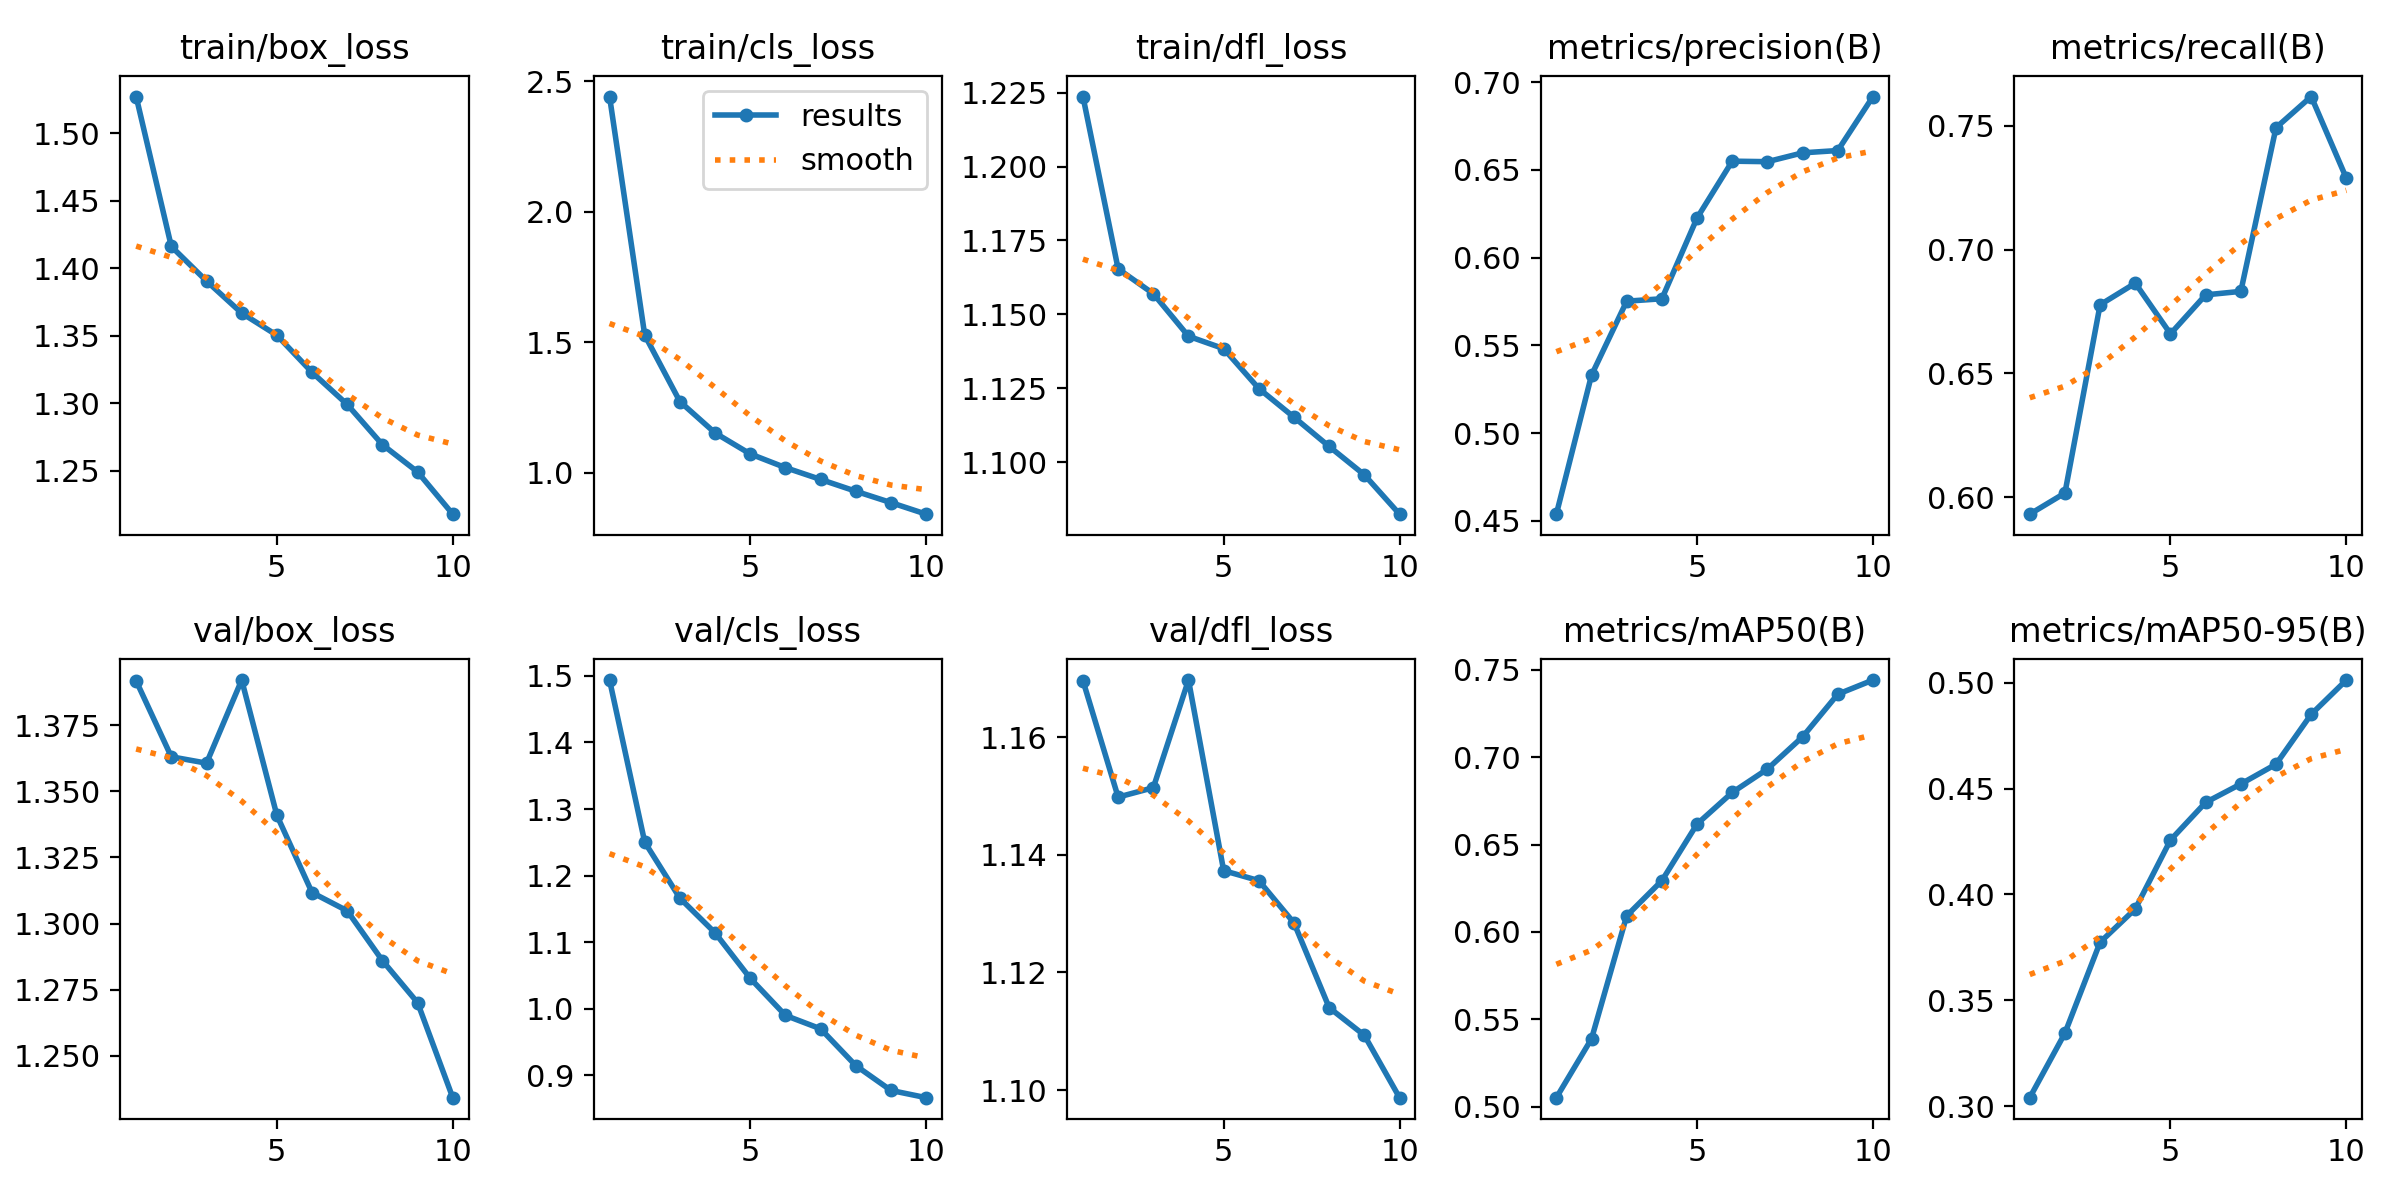

In [24]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/automate/datasets/runs/detect/train5/results.png', width = 600)

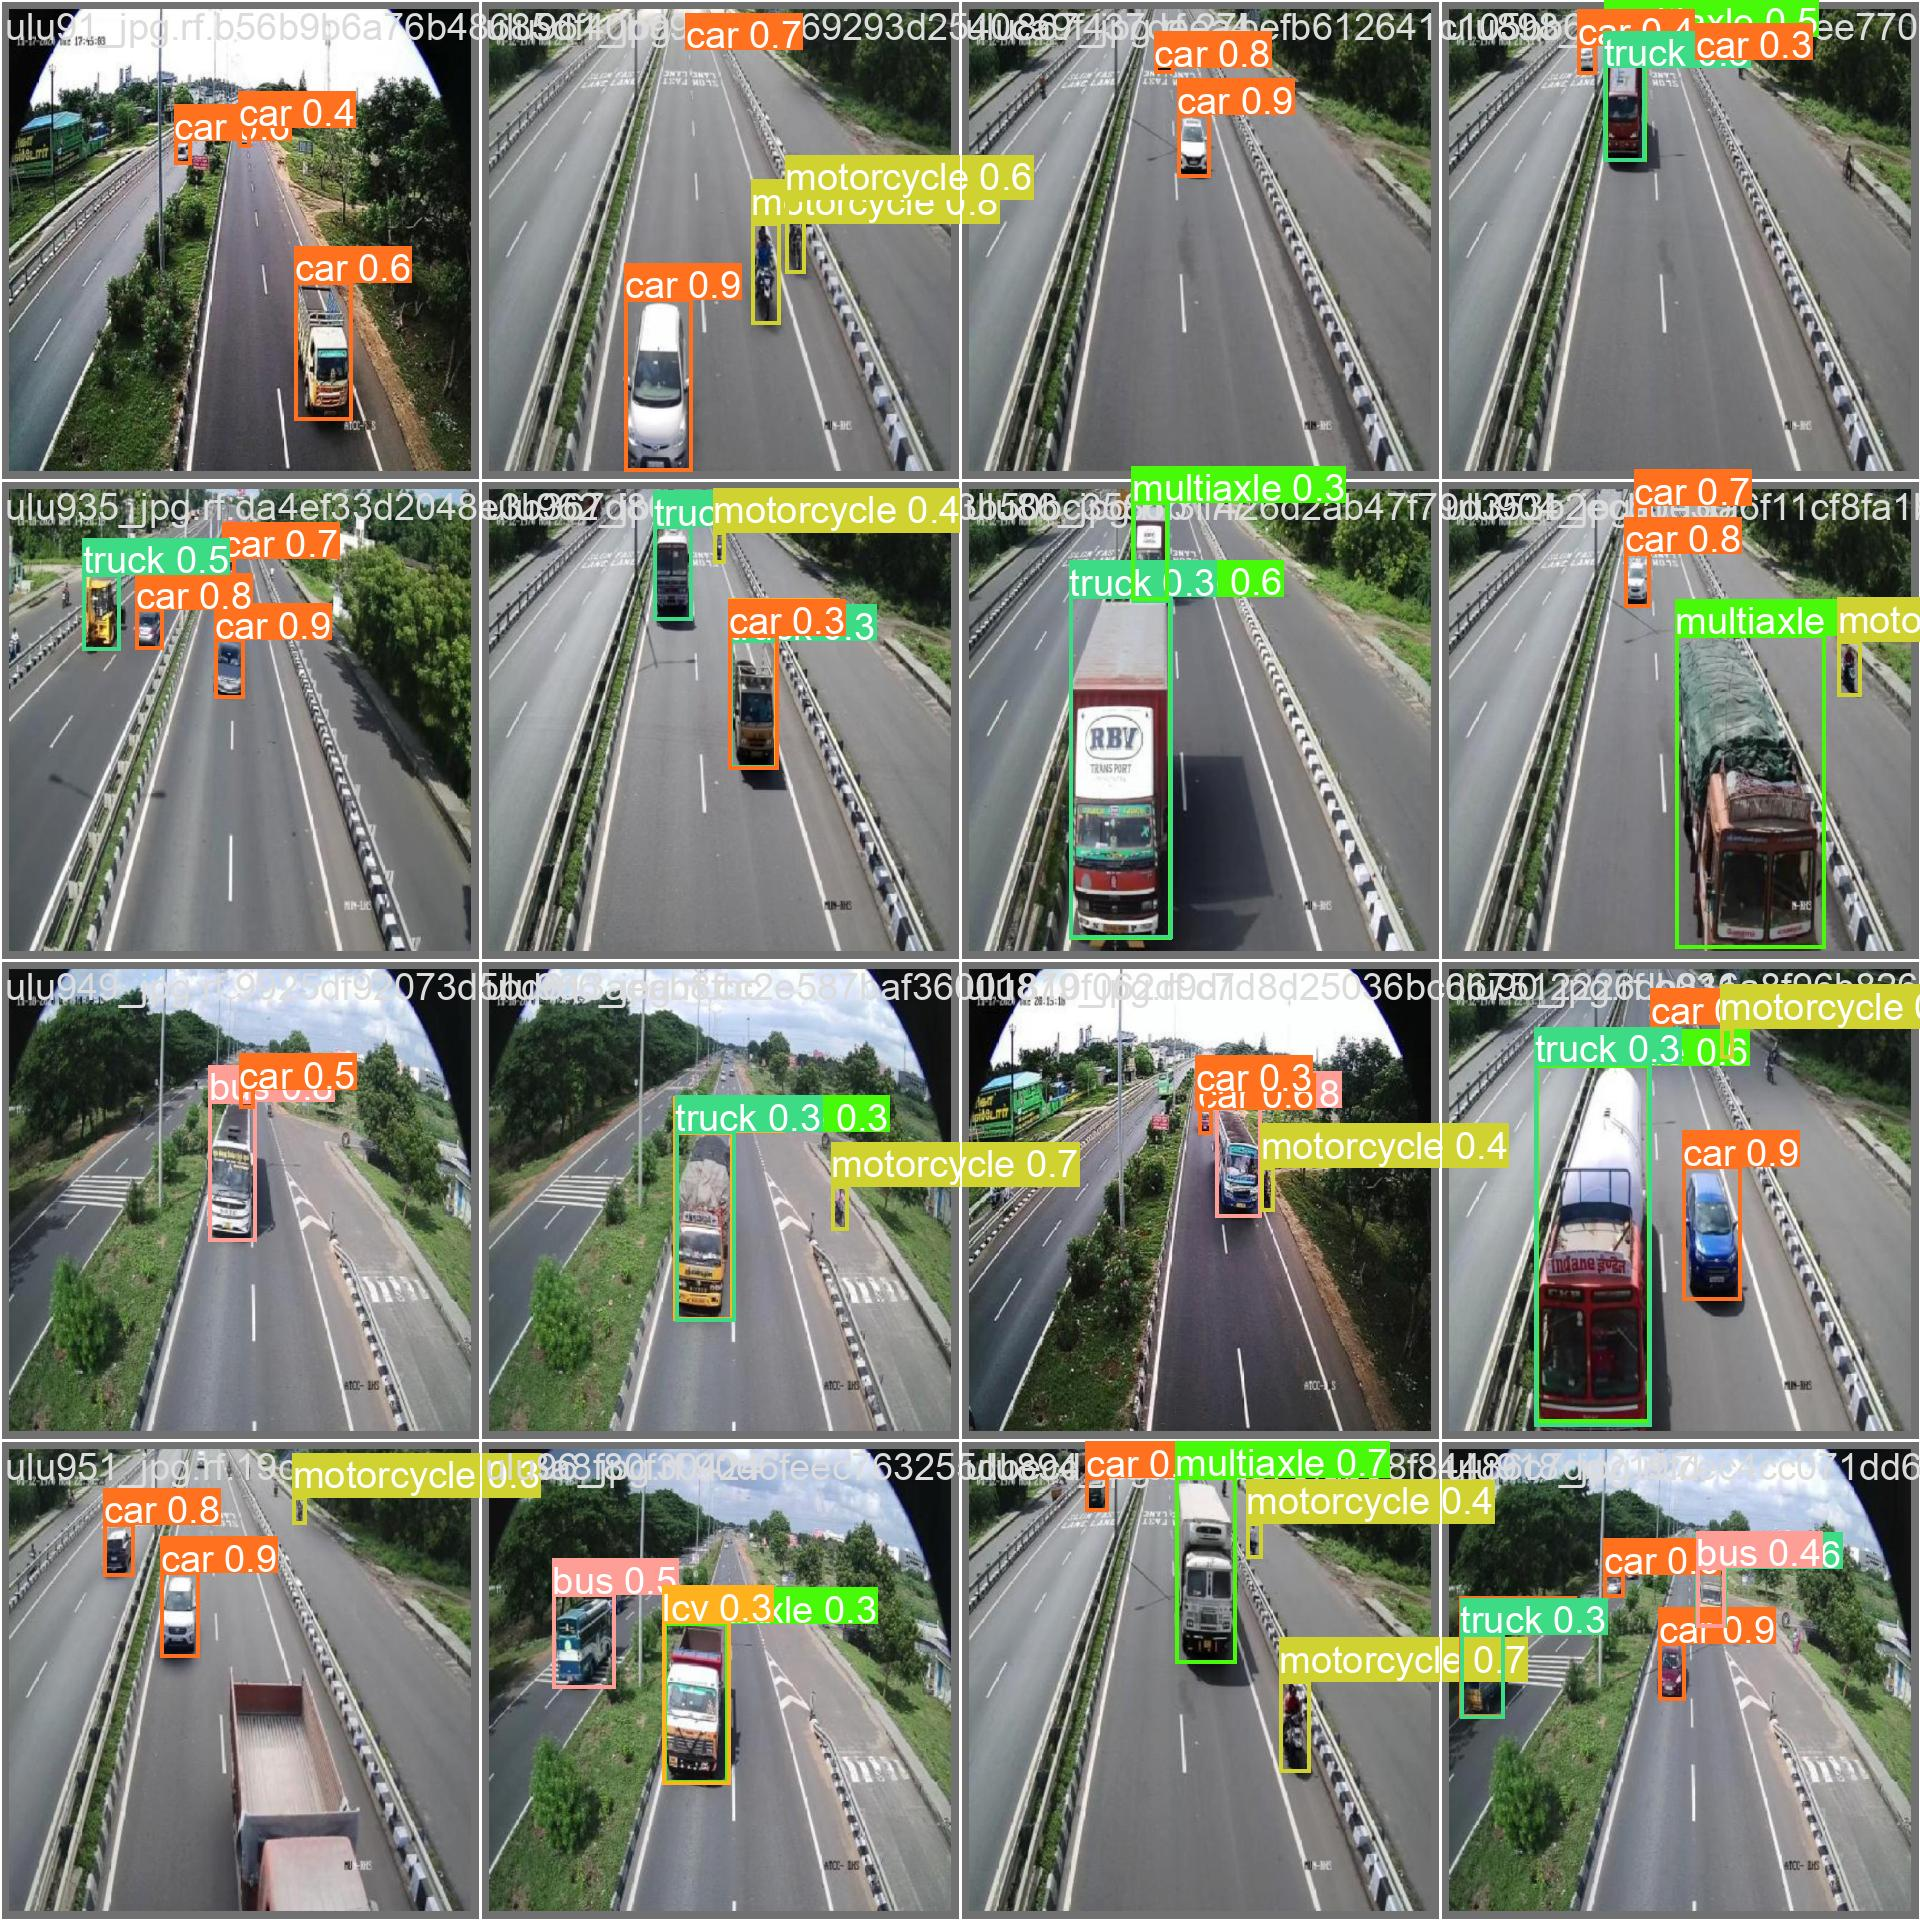

In [25]:
Image(filename='/content/drive/MyDrive/Colab Notebooks/automate/datasets/runs/detect/train5/val_batch0_pred.jpg', width=600)

In [29]:
%ls

runs/  vehicle-1/  yolov8n.pt  yolov8x.pt


In [30]:
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=vehicle-1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/valid/labels.cache... 1636 images, 0 backgrounds, 0 corrupt: 100% 1636/1636 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/valid/images/highway_2784_2020-08-26_jpg.rf.b85fa76b96793423717e488d2789b37d.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/valid/images/highway_3297_2020-08-26_jpg.rf.e4462f05214cbda430a49e458c84a9d5.jpg: 1 duplicate labels removed
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instance

In [32]:
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.25 source=vehicle-1/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

image 1/818 /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/test/images/Highway_1007_2020-07-30_jpg.rf.08a5e1728d8fe0f1ac9a27a29d05c74f.jpg: 800x800 1 auto, 2 cars, 1 motorcycle, 11.0ms
image 2/818 /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/test/images/Highway_1007_2020-07-30_jpg.rf.a8a6e6e5fadd624c817cc7b961f8c8d4.jpg: 800x800 1 auto, 1 car, 2 motorcycles, 10.1ms
image 3/818 /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/test/images/Highway_1008_2020-07-30_jpg.rf.06801fd5645f602ae84bf7f89a1a1368.jpg: 800x800 1 auto, 1 car, 3 motorcycles, 10.0ms
image 4/818 /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/test/images/Highway_1009_2020-07-30_jpg.rf.ea5b32a4723c6f91b70a387d2d0c89ed.jpg: 800x800 1 auto, 2 cars, 1 motorcycle, 10.0ms
image 5/818 

In [33]:
import glob
from IPython.display import Image, display

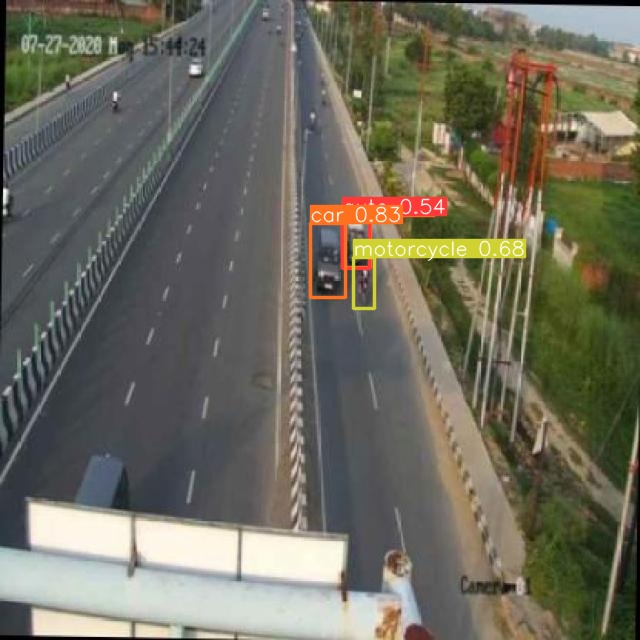

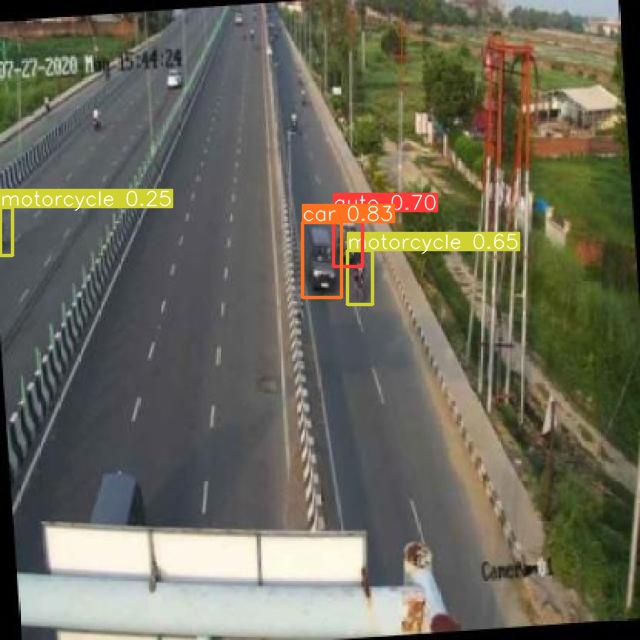

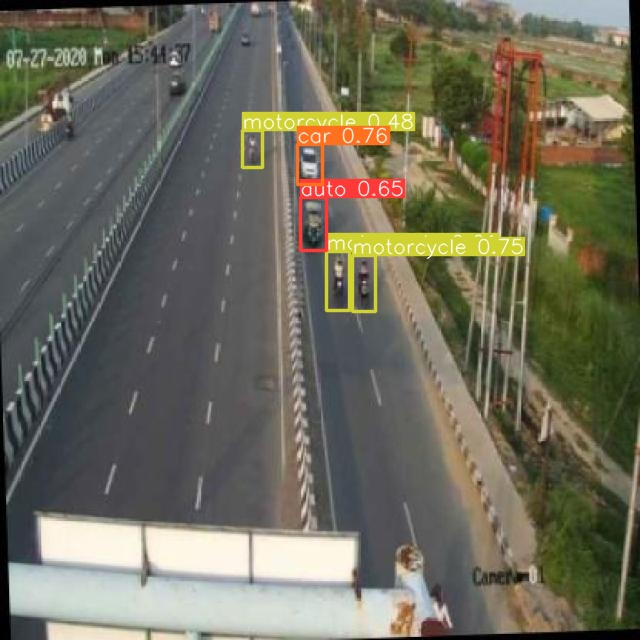

In [35]:
for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [36]:
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.25 source=vehicle-1/a.mp4 save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/856) /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/a.mp4: 480x800 (no detections), 113.1ms
video 1/1 (2/856) /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/a.mp4: 480x800 (no detections), 10.7ms
video 1/1 (3/856) /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/a.mp4: 480x800 (no detections), 12.0ms
video 1/1 (4/856) /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/a.mp4: 480x800 (no detections), 11.1ms
video 1/1 (5/856) /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/a.mp4: 480x800 (no detections), 9.8ms
video 1/1 (6/856) /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/a.mp4: 480x800 (no detections), 10.5ms
video 1/1 (7/856) /content/drive/MyDrive/Colab Notebooks/automate/datasets/vehicle-1/a.m